<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 14 - HANDS ON MACHINE LEARNING**
## **Vision por computadora usando CNN's**

A lo largo de este capitulo el libro se propone analizar las redes neuronales convolucionales (CNN) y su implementacion con TensorFlow y Keras aplicadas a la vision por computadora. En capitulos posteriores va a utilizar tambien CNN's para otro tipo de tareas.

### **Capas convolucionales**
Las capas convolucionales son los ladrillos elementales para construir una CNN. 
Las neuronaes en estas capas no estan conectadas a todos los datos de entrada (que de ahora en mas vamos a suponer que es una matriz donde cada elemento es un pixel y por lo tanto representa una imagen) sino a un pequeño grupo llamado _receptive fields_. Esta forma de conectar las neuronas permite que la red se concentre en atributos de pequeña escala.

_ver lo de zero padding_

En general los campos de vision o _receptive fields_ entre dos neuronas contiguas se suelen solapar, tal como se muestra en la figura $14.3$ del libro, sin embargo el tamaño del solapamiento puede ser elegido segun la arquitectura. El parametro de control que nos permite seleccionar cuan solapado esta el campo de vision de dos neuronas contiguas se denomina _stride_. Aumentar el stride reduce el solapamiento y esto, obviamente, reduce la cantidad de neuronas en la capa. Esto se ejemplifica en la figura $14.4$ del libro.

_Aca el libro no explica demasiado como se conectan ni como son estas neuronas, quizas mas adelante lo explique mejor. Si no lo hace volver aca y explicarlo con alguna otra fuente_

### **Filtros**

Si pensamos los pesos de una neurona como una matriz que puede tomar distintos valores, poner cero en un elemento implica que no va a considerar el pixel del cual proviene. Por el contrario, poner un uno implica lo contrario, un transpaso perfecto del pixel original. De esta forma, si todas las neuronas en una capa tienen un unico "filtro" aplicado a sus pesos entonces la salida de esta imagen sera una nueva imagen donde se resalta las caracteristicas del filtro usado. Ejmeplos tipicos de filtros son los verticales, horizontales, de blurreo, etc. La idea es que uno no seleccione estos filtros sino que sea la red quien aprenda cuales son los filtros ideales dada una funcion de costo y un conjunto de entrenamiento. 

## **Apilando distintas capas de atributos**

Hasta el momento solo utilizamos un "filtro" o "seleccionador de atributo" por capa, pero de forma mas general uno puede utilizar mas de uno por capa. O sea, puede buscar muchos atributos en una misma capa. Cuando utilizamos un solo filtro por capa lo que estamos haciendo es utilizar una cantidad de $N \times M$ neuronas, donde este es el numero de pixeles en la capa. Todas estas neuronas comparten los mismos pesos y el mismo bias. Cuando utilizamos mas de un filtro por capa, cada uno de estos filtros comparte los pesos y bias para todas sus neuronas y a su vez estos difieren de los de las neuronas de los otros filtros. Entonces, las neuronas de un filtro en la capa $l$ estan conectadas con todos los features de la capa anterior $l-1$. La realidad es que ni las figuras de este libro ni las que se suelen encontrar por internet me sirvieron demasiado para entender como funciona una neurona dentro de una capa convolucional. A mi me sirvio empezar tratando de entender como opera una neurona, luego pasar a una capa, luego aumentar la cantidad de atributos, etc. O sea, empezar con el caso mas sencillo e ir complejizando la configuracion hasta llegar a una real.

Para empezar a pensar el funcionamiento de una capa convolucional primero podemos pensar que nuestra imagen de entrada es una matriz sencilla. Sobre esta matriz definimos una zona de accion de cada neurona, lo que el libro llamo _receptive fields_. En la figura de abajo la imagen es la matriz de la izquierda y el recuadro en transparencia azul seria el area de accion de la primer neurona. Esta primer neurona se encarga de calcular el valor de primer elemento del feature representado con una matriz a la derecha de la imagen. La neurona tambien la represento como una matriz. Esta representacion lo que indica es el peso que le debo aplicar a cada elemento de su zona de accion. Sin embargo, aunque la represente asi en realidad esta neurona es un perceptron simple sin ninguna complejidad adicional. Por lo tanto la accion que realiza esta neurona es multiplicar cada elemento de su zona de accion por el peso indicado en la neurona y luego realizar la suma de todos ellos. Ademas se le puede agregar un termino de _bias_. 

$Z = b + \sum_{i=0}^{tam_f}\sum_{j=0}^{tam_c}x_{i,j}w_{i,j}$ \mirar esto con cuidado

Donde $Z$ indica el valor de esta unica neurona en el feature calculado. Para calcular el valor adyacente se debe incorporar una neurona extra. Esta neurona comparte los valores de los pesos y del bias de esta primer neurona mostrada. De hecho, se necesita una neurona para cada valor del campo de feature. Y de igual forma, todas estas neuronas son similares entre si (en el valor de sus pesos y el bias). La unica diferencia entre ellas es el campo de accion que tienen sobre la imagen original. 




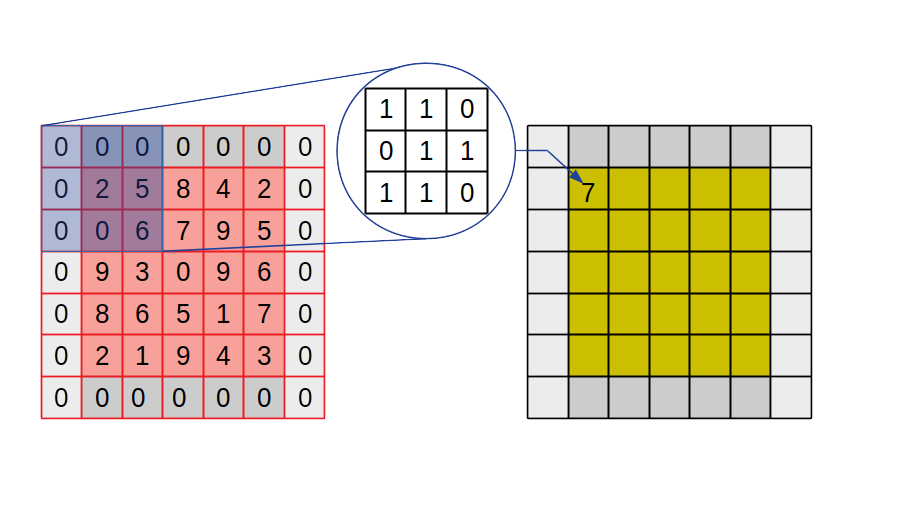

Hasta ahora vimos el caso mas sencillo, una imagen que podemos pensar como una unica matriz y al cual le aplicamos un filtro y que nos devuelve por lo tanto un unico campo nuevo como resultado. El siguiente paso en complejidad que podemos agregar es pensar en una imagen que esta formada por mas de un campo, o sea, mas de una matriz. Pensemos, por ejemplo, que la imagen esta compuesta por 3 campos, uno para el color rojo, otro para el color verde y un tercero para el color verde, o sea, una codificacion RGB. Luego vamos a ver que podemos generalizar aun mas este concepto y pensar que estos distintos campos son distintos features de una misma imagen. En este caso seguimos teniendo un unico filtro. Como tenemos un solo filtro nuestro _output_ sigue siendo un unico campo y por lo tanto seguimos teniendo una "unica" neurona repetida por cada elemento del campo. Sin embargo, esta neurona puede tener distintos pesos para cada elemento de cada campo de la imagen de entrada. En el caso anterior pensamos estos pesos como una matriz reducida que aplicabamos sobre el _receptive field_ de la matriz original. En este caso podemos pensarlo de forma similar, pero donde tenemos que aplicar 3 matrices sobre las tres imagenes de entrada. La neurona entonces aplica una matriz sobre cada una de las tres matrices de entrada y todas aplican sobre el mismo _receptive field_. En la imagen de abajo se puede ver como se aplica cada una de las matrices de pesos de la **misma** neurona sobre el mismo pedazo de la imagen (_receptive field_) en cada una de las matrices de la imagen original. O sea, se aplican los pesos correspondientes a la matriz de color rojo sobre los primeras 3 filas y 3 columnas, al mismo tiempo se aplica, sobre este mismo sector pero en las matrices verde y azul los pesos correspondientes. Finalmente, como la operacion que hace cada neurona siempre es la misma, el peso $w$ por el val. No esta de mas volver a aclarar que aunque tenemos 3 matrices de pesos son todas parte de una misma neurona. Para movernos al siguiente elemento del campo de salida debemos desplazar el _receptive field_ en los 3 campos originales y aplicar sobre ellos una nueva neurona. Esta neurona, al igual que explicamos en el caso anterior con un solo campo, es similar a la que aplica al primer elemento. De hecho, nuevamente, todas las neuronas de un mismo campo son similares, en el sentido de que todas comparten los mismos pesos y bias. Pero, aunque quizas sea redundante volver a aclararlo, no es la misma neurona que se va "moviendo" sino una nueva neurona independiente, identica pero independiente.

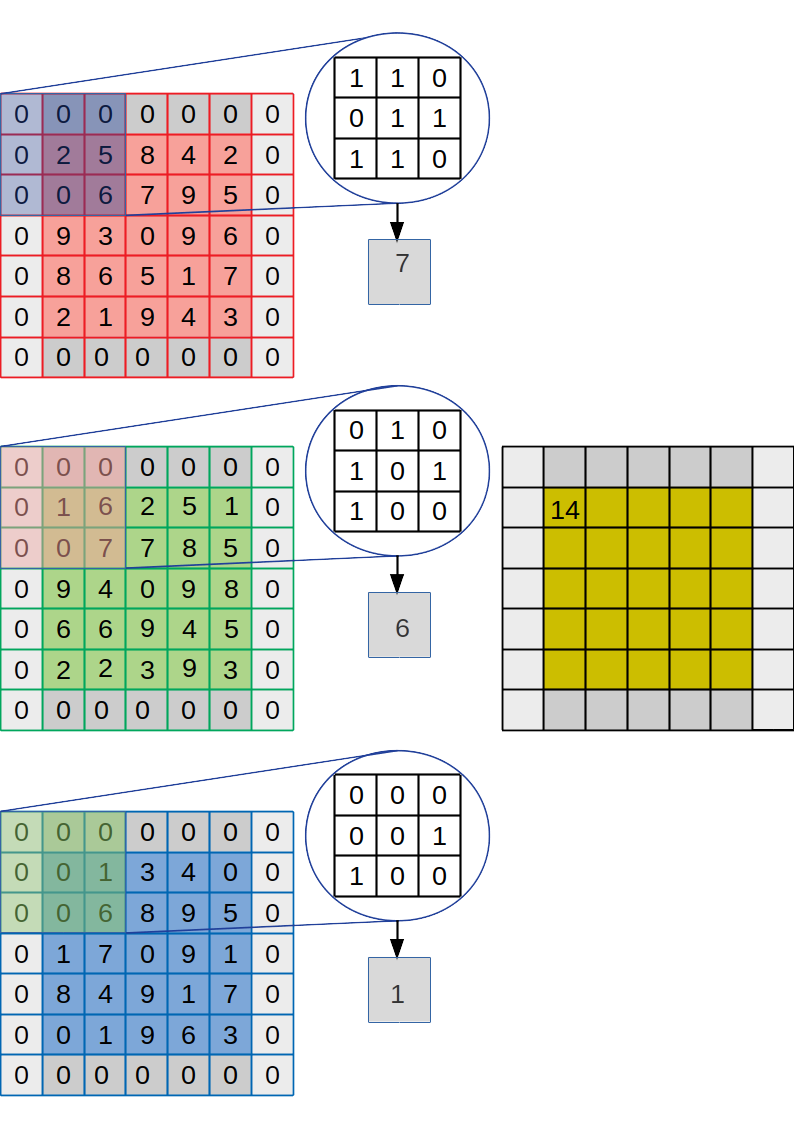

Una vez entendido como se aplica un feature sobre una imagen (que puede tener mas un campo de features que la compongan) podemos pasar a un caso levemente mas complejo. En este caso tenemos una imagen compuesta por los mismos $3$ features anteriores (los colores RGB) pero sobre ella aplicamos dos features nuevos distintos. En la imagen de abajo representamos el _Feature Map 1_ en amarillo y el _Feature Map 2_ en violeta. Ambos son similares en construccion. Cada uno de ellos se puede pensar como una matriz que aplica sobre los features de la imagen de la capa anterior. Como la capa anterior tiene una imagen compuesta por $3$ features (RGB en el ejemplo) cada feature map nuevo ($1$ y $2$) tiene que poder aplicar sobre cada uno de ellos. La forma mas clara de representar esto vuelve a ser utilizar una matriz para feature de la capa previa, por eso, si miramos por ejemplo el _Feature Map 2_ esta representado por $3$ matrices  (que en particular arrojan los resultados $5$, $13$ y $7$ respectivamente). Sin embargo, vuelvo a aclarar, estas 3 matrices son en realidad parte de una unica matriz mas amplia y forman parte de una unica neurona. Esta neurona, al igual que en el caso anterior, es la responsable de escribir un unico valor sobre el campo de features numero $2$. En particular, en la figura se muestra el calculo del primer elemento del campo $2$ que arroja un valor de $25$. Para poder calcular el valor contiguo, o cualquiera de este campo, debemos utilizar una nueva neurona identica a la anterior (o sea, con los mismos valores de peso y bias). Por lo tanto, al igual que ya dijimos, tenemos tantas neuronas por feature como elementos tiene el campo asociado. El calculo del campo del feature $1$ representado en amarillo corre de forma paralela e independiente. Vemos entonces que sobre una misma imagen, sin importar cuantos features la compongan, podemos aplicar una cantidad arbitraria de nuevos features. En nuestro caso partimos de una imagen como $3$ features (RGB) y terminamos con una imagen de $2$ features, "amarillo" y "violeta".

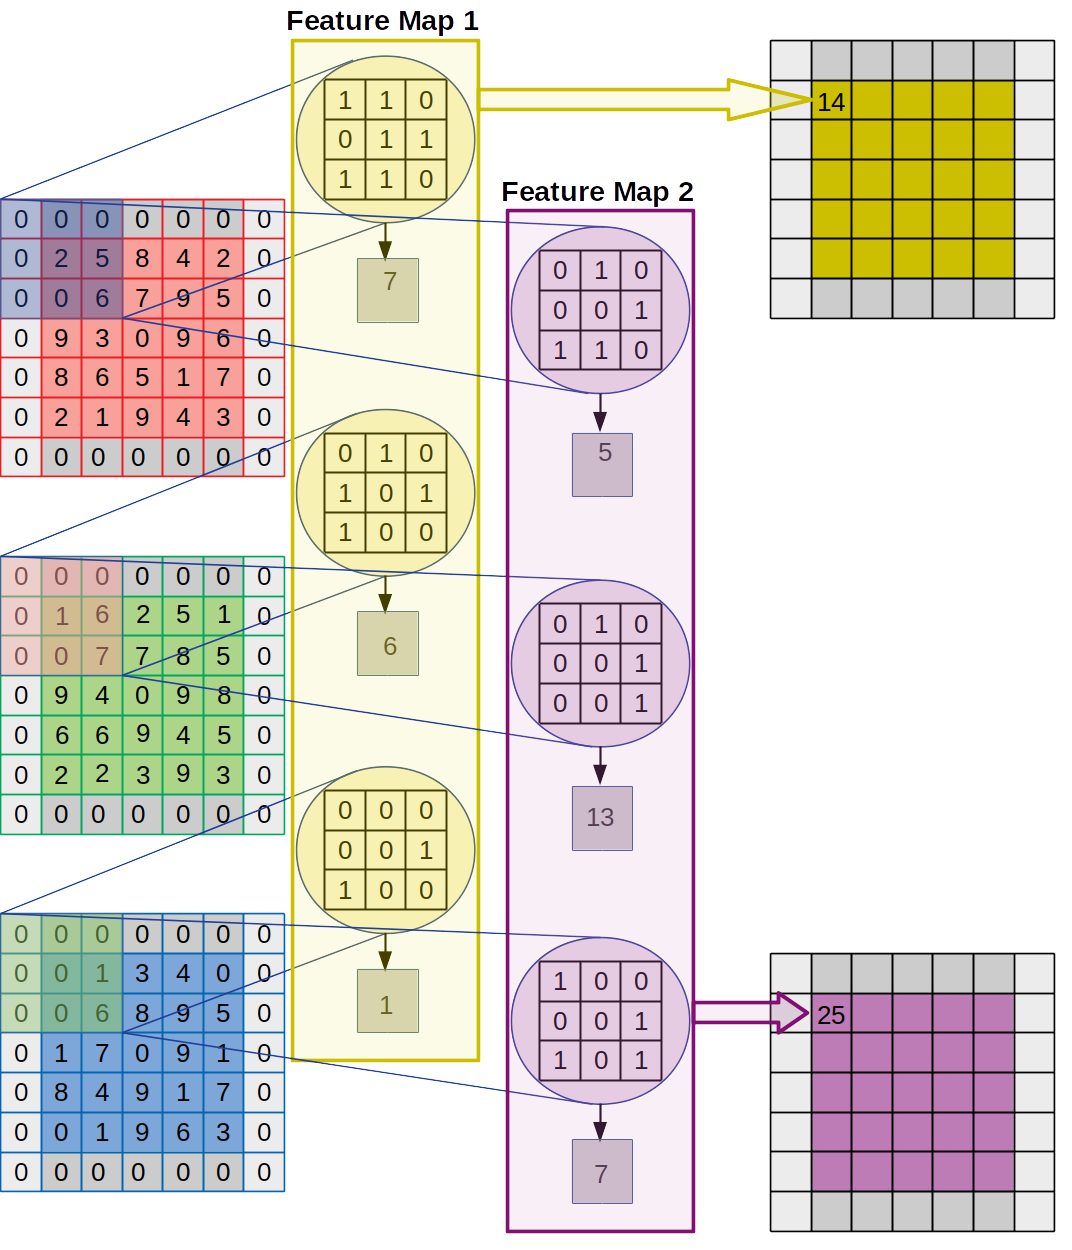

Esta representacion que utilizamos hasta el momento sirve para entender la construccion de cada capa y lo que significa una neurona en este contexto. De hecho vimos que las neuronas utilizadas por las capas convolucionales son identicas a las de una capa densa (perceptron simple) pero simplemente agrupadas de forma distinta. Vimos que cada feature (o filtro) se puede pensar como un conjunto de neuronas identicas (iguales valores de pesos y bias) que aplican cada una sobre un conjunto determinado de los datos de entrada (receptive field). De esta forma nos apartamos un poco de la idea de filtros que se desplazan por la imagen, de la idea de movimiento o de secuencialidad temporal. Cada feature map nuevo es simplemente un conjunto de neuronas identicas donde cada una de ellas tiene conexiones solo a un subconjunto (muy particular) de los datos de entrada (la capa anterior, sea esta la de entrada o una capa intermedia). Sin embargo, esta forma de representar, aunque mas clara (a mi modo de ver) es menos util para desacribir arquitecturas de red complejas. Por ese motivo se suele utilizar una forma grafica parecida a la mostrada en la imagen de abajo. En estos tipos de visualizacion se suelen graficar los distintos features de cada capa como planos superpuestos. Veamos entonces como se puede representar el ejemplo anterior. En nuestro caso tenemos 3 features en la primer capa (L) que identificamos con los colores RGB. Luego, en la capa posterior (L+1) tenemos 2 features a los que llamamos _Feature Map 1_ y _Feature Map 2_, el primero lo identificamos con el color amarillo claro y al segundo con el color violeta. En la figura de abajo esta identificación la podemos hacer mostrando como "una neurona" de cada color colecta el espacio correspondiente de los features en la capa anterior y escribe el resultado en los features de la capa correspondiente. Podemos ver entonces como la neurona amarilla aplica sobre el receptive field aplicado a los colores RGB y como luego escribe el valor en el _Feature Map 1_ en la posicion correspondiente. De igual forma la neurona violeta hace lo mismo pero esta escribe sobre el _Feature Map 2_. Sin embargo, por una mayor claridad en la visualizacion utilizamos distintos receptive field para estos dos features. Debemos recordar sin embargo que para poder calcular cada uno de los valores de un feature en la capa L debemos tener una neurona por cada uno de ellos. O sea, si nuestro _Feature Map 1_ tiene $N \times M$ valores que calcular debemos tener $N \times M$  neuronas identicias (mismos pesos y mismo bias).

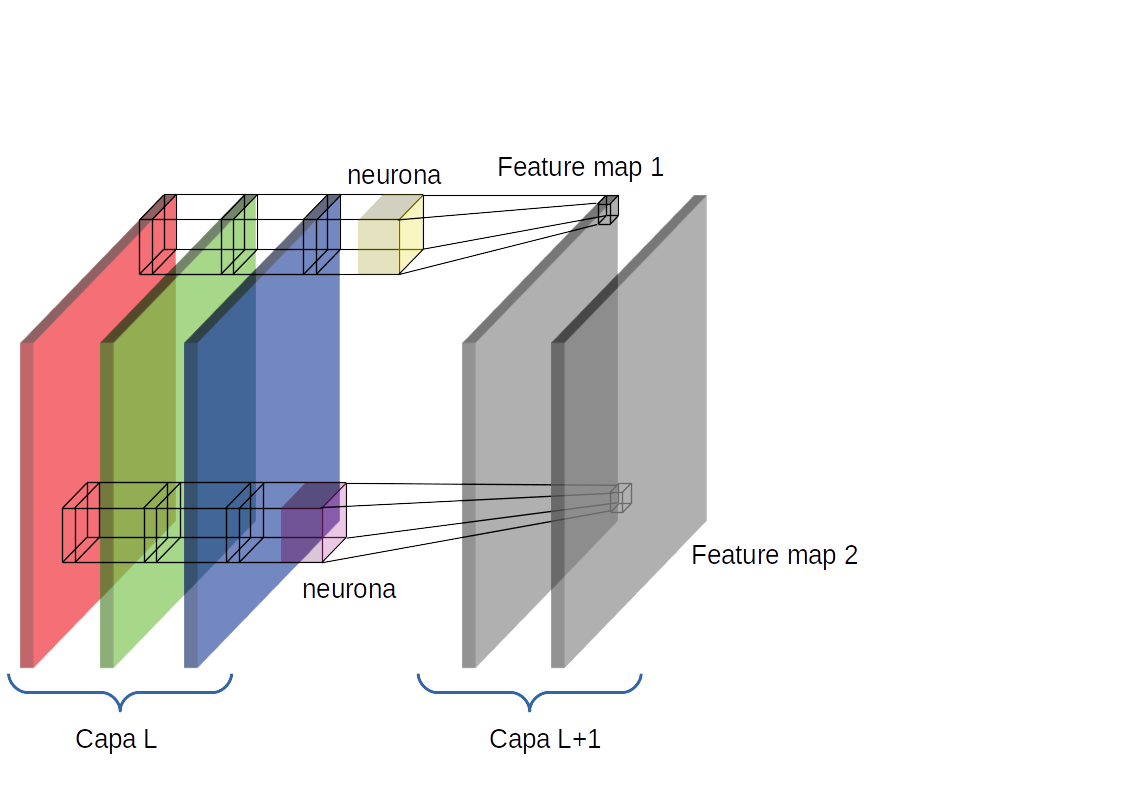

Cuando uno ya entendio la estructura de las capas convolucionales puede simplificar aun mas la representacion que uno hace de ellas y eliminar las neuronas que calcular los distintos _Feature Maps_ pues queda implicita su existencia para cada uno de ellos. Por eso la representacion mas usual es la que se muestra debajo donde se grafican solamente la cantidad de Features en cada capa. De hecho, muchas veces esto se indica solamente con bloques rectangulares donde se indican sus dimensiones. Asi, por ejemplo, un bloque en la capa L de alto N, profundidad M y ancho K, indica que esa capa tiene K features y donde cada uno de ellos tiene $N \times M$ elementos.

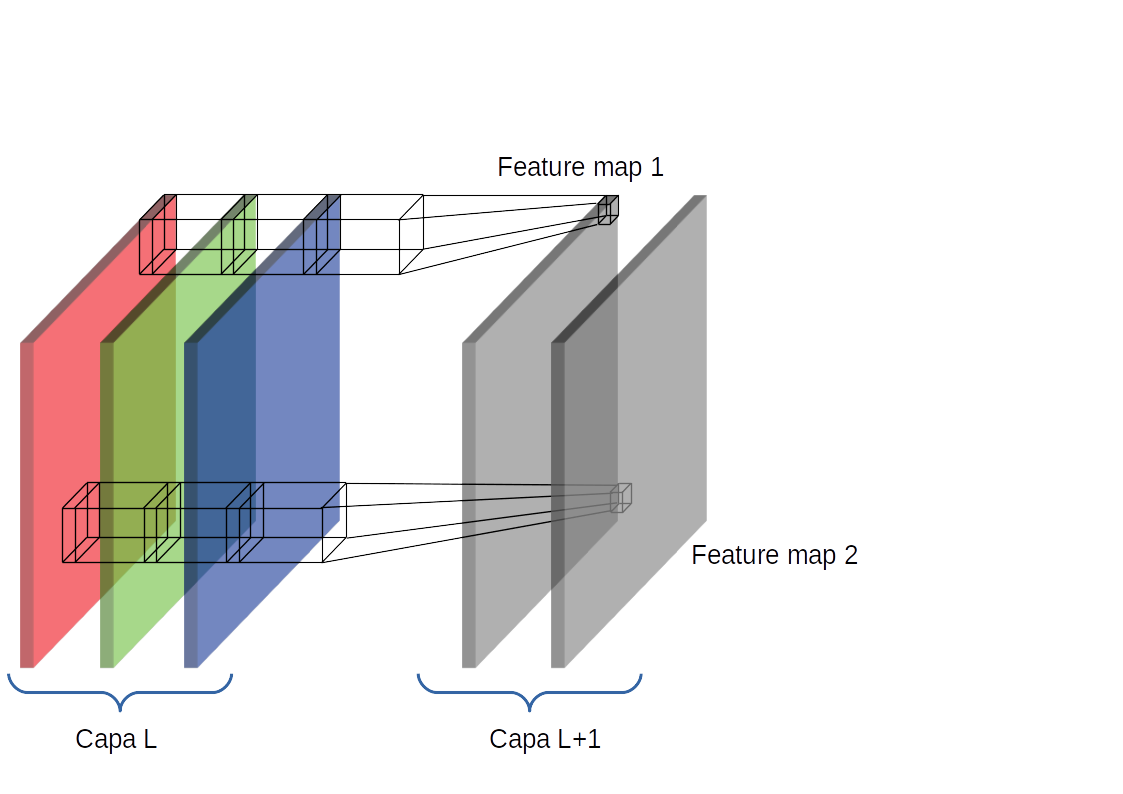

En la implementacion de TensorFlow cada imagen se representa como un tensor de 3 dimensiones, (Alto, Ancho, Canales). Un mini-batch de imagenes se representa entonces como un tensor de 4 dimensiones (Mini-batch Size, Alto, Ancho, Canales). Los pesos de una capa convolucional se representan como un tensor de 4 dimensiones (Alto filtro, Ancho filtro, Canales capa anterior, Canales capa actual). Los bias de una capa se representan como un tensor en una dimension (Canales en la capa actual).

Veamos una implementacion de un filtro (NO ENTRENABLE) usando TensorFlow.

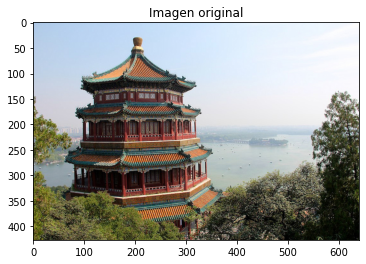

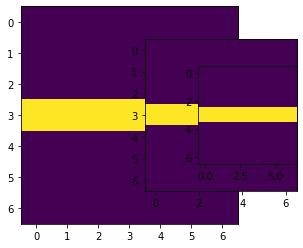

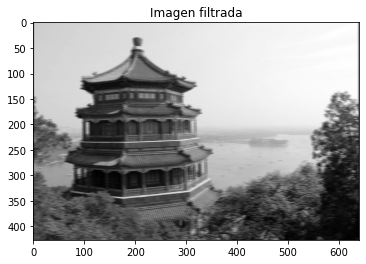

In [14]:
import tensorflow as tf
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
plt.figure()
plt.imshow(china)
plt.title('Imagen original')
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
# Create 2 filters
k = 2 
filters = np.zeros(shape=(7, 7, channels, k), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line
fig = plt.figure()
axs = []
c = 1
for canal in range(channels):
  axs.append(fig.add_subplot(1,canal+1,c))
  axs[canal].imshow(filters[:,:,canal,1])
  c = c + 1
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.figure()
plt.title('Imagen filtrada')
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd

plt.show()